# Importing Packages

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import pandas as pd

# Importing Dataset

The dataset we are going to use in this article is the famous Iris data set. Some additional information about the Iris dataset is available at:

https://archive.ics.uci.edu/ml/datasets/iris

The dataset consists of 150 records of Iris plant with four features: 'sepal-length', 'sepal-width', 'petal-length', and 'petal-width'. All of the features are numeric. The records have been classified into one of the three classes i.e. 'Iris-setosa', 'Iris-versicolor', or 'Iris-verginica'.

Execute the following script to download the dataset using pandas:

In [16]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
names = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']
dataset = pd.read_csv(url, names=names)

# Let's take a look at what our dataset looks like:

In [17]:
dataset.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Preprocessing
The first preprocessing step is to divide the dataset into a feature set and corresponding labels. The following script performs this task:

In [18]:
Features = dataset.drop('Class', 1)
Labels = dataset['Class']

#  from datafram to mumurcal metrix of numpy
Features = pd.DataFrame(Features).to_numpy()
Labels_codes, Labels_uniques = pd.factorize(Labels)

### Note: we do not normalize our data since we want to plot the support vectors


# Plot SVM classifiers for the iris dataset

Comparison of different linear SVM classifiers on a 2D projection of the iris
dataset. We only consider the first 2 features of this dataset:

- Sepal length
- Sepal width

This example shows how to plot the decision surface for four SVM classifiers
with the linear models ``LinearSVC()`` 

In [23]:
# Take the first two features. We could avoid this by using a two-dim dataset
# Note that, one may try using PC1 & PC2 instead for the better ressult.

X = Features[:,0:2]
y = Labels_codes

# we create an instance of SVM and fit out data. We do not scale our data since we want to plot the support vectors

C = 1 # SVM regularization parameter
models = svm.LinearSVC(C=C, max_iter=10000) 

# svm.LinearSVC(C=C, max_iter=10000),
# svm.SVC(kernel='rbf', gamma=0.7, C=C),
# svm.SVC(kernel='poly', degree=3, gamma='auto', C=C)

models = models.fit(X, y) 

# Visualize 

Text(0.5, 1.0, 'SVM with LinearSVC kernel')

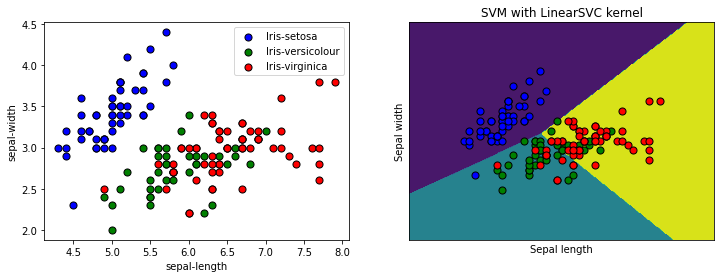

In [24]:
X0, X1 = X[:, 0], X[:, 1]

# Meshgrid for the plot

x_min, x_max = X0.min() - 1, X0.max() + 1
y_min, y_max = X1.min() - 1, X1.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

xx, yy = make_meshgrid(X0, X1)

Z = models.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Scatter + Meshgrid for the plot
fig = plt.figure(figsize = (12,4))
fig.add_subplot(1,2,1) 
#Visualising the Labels_codes - On the first two columns
plt.scatter(X[Labels_codes   == 0, 0], X[Labels_codes == 0, 1],s = 50, c = 'b', label = 'Iris-setosa',edgecolors='k')
plt.scatter(X[Labels_codes   == 1, 0], X[Labels_codes == 1, 1],s = 50, c = 'g', label = 'Iris-versicolour',edgecolors='k')
plt.scatter(X[Labels_codes   == 2, 0], X[Labels_codes == 2, 1],s = 50, c = 'r', label = 'Iris-virginica',edgecolors='k')   

plt.xlabel("sepal-length")
plt.ylabel("sepal-width")
plt.legend()

fig.add_subplot(1,2,2) 
plt.contourf(xx, yy, Z)
#Visualising the Labels_codes - On the first two columns
plt.scatter(X[Labels_codes   == 0, 0], X[Labels_codes == 0, 1],s = 50, c = 'b', label = 'Iris-setosa',edgecolors='k')
plt.scatter(X[Labels_codes   == 1, 0], X[Labels_codes == 1, 1],s = 50, c = 'g', label = 'Iris-versicolour',edgecolors='k')
plt.scatter(X[Labels_codes   == 2, 0], X[Labels_codes == 2, 1],s = 50, c = 'r', label = 'Iris-virginica',edgecolors='k')   
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xticks(())
plt.yticks(())
plt.title('SVM with LinearSVC kernel')